<a href="https://colab.research.google.com/github/positmin/positmin/blob/main/02_2%EC%9D%BC%EC%B0%A8_Video_processing_20221027.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## 2022.10.27 09:30

In [ ]:
!pip install youtube-dl==2020.12.2
!pip install pafy # 유튜브 키이를 받는 것으로 수정

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 8.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 설치가 안되는 것 같음
#!pip uninstall -y opencv-python-headless opencv-contrib-python
#!apt install python3-opencv

In [ ]:
!youtube-dl https://www.youtube.com/watch?v=piXrU34v7BY -f 22 -o video.mp4
# https://www.youtube.com/watch?v=\gwzwS6r6C8

[youtube] piXrU34v7BY: Downloading webpage
[download] Destination: video.mp4
[download] 100% of 8.11MiB in 03:17


In [ ]:
# 동영상 편집 프로그램 ffmpeg
!pip install ffmpeg-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
## 09:47
!ffmpeg -i video.mp4 -t 00:00:06 -c:v copy test.mp4

ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-li

In [ ]:
!ffmpeg -ss 00:00:30 -i video.mp4 -t 00:00:05 -c:v copy test2.mp4
## --ss가 아님!

ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-li

# Multipurpose Internet Mail Extensions
- base64 : 바이트 스트림을 화면에 표시할 수 있는 ASCII문자로 바꾸는 인코딩 방식
# IPython : Command line interface를 위한 모듈

In [ ]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('test.mp4','rb').read() # 동영상을 웹에서 사용하는 바이트 스트림으로 변경
data_url = "data:video/mp4:base64," + b64encode(mp4).decode()
HTML("""
<video width=500 controls>
<source src="%s" type="video/mp4">
</video>
""" % data_url)
## 이거 자체가 웹브라우저임

In [ ]:
import os
os.mkdir ('output_image')

In [ ]:
!ffmpeg -i test.mp4 -vf fps=1 ./output_image/out%d.png

ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-li

# 이미지로부터 동영상

In [ ]:
## 10:10

In [ ]:
import os
import glob
os.mkdir("./moviemaker")
os.chdir("./moviemaker")
# %cd /content/drive/MyDrive/Colab Notebooks/challenge/data
!unzip -qq "/content/drive/MyDrive/Colab Notebooks/challenge/data/flowers.zip"

In [ ]:
filepaths = list(glob.glob('/content/moviemaker/roses/*.jpg'))
len(filepaths)

625

In [ ]:
import cv2;
print(cv2.__version__)

4.6.0


In [ ]:
import cv2;
print(cv2.__version__)
from PIL import Image
print(os.getcwd())

4.6.0
/content/moviemaker/roses


In [ ]:
os.chdir("/content/moviemaker/roses")
path = ("content/moviemaker/roses")
mean_height = 0
mean_width = 0

num_of_images = len(os.listdir('.'))
num_of_images

626

In [ ]:
import os

cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Files in '/content/moviemaker/roses': ['16903172207_2cd7aca66a.jpg', '6409000675_6eb6806e59.jpg', '6473543547_4fefdbd5dc.jpg', '5212885371_fe27c406a2_n.jpg', '8096324039_4db2555490.jpg', '7420699022_60fa574524_m.jpg', '3526860692_4c551191b1_m.jpg', '14494590921_3bb1dc7b88_n.jpg', '298670754_f25edda891.jpg', '2392457180_f02dab5c65.jpg', '4248222578_b4d5868b32.jpg', '6105809987_8f3d7a8d67_n.jpg', '9353111163_7a89b2df35_n.jpg', '14747962886_2bff6bb323_m.jpg', '4860145119_b1c3cbaa4e_n.jpg', '4918137796_21f0922b0c_n.jpg', '5487945052_bcb8e9fc8b_m.jpg', '685724528_6cd5cbe203.jpg', '2059172936_032ffc12aa.jpg', '9369421752_db1ab2a6a4_m.jpg', '3276552939_8c31b22d3e.jpg', '873660804_37f5c6a46e_n.jpg', '8674140377_ae7b0be523.jpg', '512578026_f6e6f2ad26.jpg', '22679076_bdb4c24401_m.jpg', '4881402397_1c664af2f7_n.jpg', '20409866779_ac473f55e0_m.jpg', '9433167170_fa056d3175.jpg', '410421672_563550467c.jpg', '3556123230_936bf084a5_n.jpg', '1469726748_f359f4a8c5.jpg', '3550491463_3eb092054c_m.jpg', '5

In [ ]:
files = os.listdir('/content/moviemaker/roses')
for file in files:
    img = Image.open(os.path.join(path, file))

FileNotFoundError: ignored

In [ ]:
for file in os.listdir('.'):
    im = Image.open(os.path.join(path, file))
    width, height = im.size
    mean_width += width
    mean_height += height

mean_width = int(mean_width / num_of_images)
mean_height = int(mean_height / num_of_images)

FileNotFoundError: ignored

In [ ]:
# 이미지를 동일한 사이즈로 통일
for file in os.listdir('.'):
  if file.endswith(".jpg") or file.endswith(".jpeg") or file.endswith("png"):
    im = Image.open(os.path.join(path, file))
    width, height = im.size
    print(width, height)
    imResize = im.resize((mean_width, mean_height), Image.ANTIALIAS)
    imResize.save(file, 'JPEG', quality = 95)
    print(im.filename.split('\\')[-1], " is resized")

In [ ]:
## 10:30
def generate_video():
  image_folder = '.'
  images = [img for img in os.listdir(image_folder)
            if img.endswith(".jpg") or
              img.endswith(".jpeg") or
              img.endswith("png")]
  #image[0]
  #   video_name = '/content/moviemaker/mygeneratevideo.mp4'
  video_name = '/content/moviemaker/mygeneratevideo.mp4'
  os.chdir("/content/moviemaker/roses")
  frame = cv2.imread(os.path.join(image_folder, images[0]))
  height, width, layers = frame.shape
  fourcc = cv2.VideoWriter_fourcc(*'DIVX')
  # video = cv2.VideoWriter(video_name, 0, 1, (width, height))
  # codec방식을 변경
  video = cv2.VideoWriter(video_name, fourcc, 1, (width, height))
  ## 속도를 빠르게 하려면 1을 5나 10으로 변경 ((video_name, fourcc, 1, ...)
  for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))
  cv2.destroyAllWindows()
  video.release() # releasing the video generated
generate_video()

IndexError: ignored

In [ ]:
# generate_video()

# 문제
- 이미지로부터 동영상을 만드는 과정에서 어제 작업했던 가우시안 블러를 적용해서 이미지를 재처리한 다음 동영상을 만드시오
- 30초까지는 가우시안 
- 60초까지는 otsu이진화 (X) (생략)
- 90초까지는 transformation rotate 15도, 120초까지는 perspective 변환을 적용해보시오

In [ ]:
# 정답 ## 12:20
def generate_video():
  image_folder = '.'
  images = [img for img in os.listdir(image_folder)
            if img.endswith(".jpg") or
              img.endswith(".jpeg") or
              img.endswith("png")]

  video_name = '/content/moviemaker/mygeneratevideo.mp4'
  os.chdir("/content/moviemaker/roses")
  frame = cv2.imread(os.path.join(image_folder, images[0]))
  height, width, layers = frame.shape
  fourcc = cv2.VideoWriter_fourcc(*'DIVX')
  video = cv2.VideoWriter(video_name, fourcc, 5, (width, height))
  i = 0
  for image in images: # 5장 -> 1초 : 30초 -> 150장 615/150 => 2분정도 되는 frame
    i += 1
    if i <150:
    elif 150 < i <= 300:
    elif 300 < i <= 450:
    else:
    work_image = cv2.imread(os.path.join(image_folder, image))
    
    video.write(work_image)
  cv2.destroyAllWindows()
  video.release() # releasing the video generated
generate_video()

In [ ]:
# 정답 ## 12:30
import numpy as np
def generate_video():
  image_folder = '.'
  images = [img for img in os.listdir(image_folder)
            if img.endswith(".jpg") or
              img.endswith(".jpeg") or
              img.endswith("png")]

  video_name = '/content/moviemaker/mygeneratevideo2.mp4'
  os.chdir("/content/moviemaker/roses")
  frame = cv2.imread(os.path.join(image_folder, images[0]))
  height, width, layers = frame.shape
  fourcc = cv2.VideoWriter_fourcc(*'DIVX')
  video = cv2.VideoWriter(video_name, fourcc, 5, (width, height))
  i = 0
  for image in images:
    i += 1
    workimage = cv2.imread(os.path.join(image_folder, image))
    rows, cols,_ = workimage.shape
    if i <= 150 :
      dst = cv2.GaussianBlur(workimage, (5, 5), 0)
    # elif 150 < i <300 :
    # workimage = workimage.max(2) # 2개의 그룹
    # T_otsu = mahotas.otsu(workimage) # otsu 알고리즘 : thresholding 경계선의 문지방
    # dst = workimage > T_otsu # true/false
    elif 150 < i <=300:
      M = cv2.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),45,1)
      dst = cv2.warpAffine(workimage,M,(cols,rows))
    elif 300 < i < 450:
      pts1 = np.float32([[56, 65], [368, 52], [28, 387], [389, 390]])
      pts2 = np.float32([[0, 0], [300, 0],[0, 300], [300, 300]])
      M = cv2.getPerspectiveTransform(pts1, pts2)
      dst = cv2.warpPerspective(workimage,M,(cols,rows)) # 사이즈가 일치하지 않으면 불생성
    elif 450 < i:
       pts1 = np.float32([[0,0], [300,0], [128,390], [289,390]])
       pts2 = np.float32([[0,0], [300,0], [0,300], [300, 300]])
       M = cv2.getPerspectiveTransform(pts1, pts2)
       dst = cv2.warpPerspective(workimage, M, (cols, rows))
    video.write(dst)
  cv2.destroyAllWindows()
  video.release() # releasing the video generated

In [ ]:
generate_video()

In [ ]:
## 이번에는 캠을 볼 수 있도록 하겠습니다

In [ ]:
## 14:23
# 웹에서 주고 받을 때 문자열로 송수신 (네트워크, 파일은 문자로 입출력)

In [ ]:
## 12:54
from IPython.display import display, Javascript, Image # cmd interface 
from google.colab.output import eval_js 
# 문자열로 입력되는 자바스크립트를 parsing(파싱)한 다음에 실행
from base64 import b64decode, b64encode # byte stream - 네트워크 송수신을 기반으로 만들어진 webbrowser
import cv2
import numpy as np
import PIL
import io
import html
import time

In [ ]:
## 12:59
# 바이트 스트림 -> opencv에서 사용하도록 해야한다
def js_to_image(js_reply):
  image_bytes = b64decode(js_reply.split(',')[1])
  # 메모리에 있는 내용 (문자열) ## 문자열로 되어있죠? 이것을 unsigned로 변환해서
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8) # nd_array
  img = cv2.imdecode(jpg_as_np, flags=1) ## 이미지 디코더를 이용해서 이미지를 변환한다
  return img
# 바운딩 박스 ( face detection -> Bounding box )
def bbox_to_bytes(bbox_array): # 바운드 박스(opencv)
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  bbox_PIL.save(iobuf, format='png')
  # media style을 지정해줌 (헤더) -> 메일에서는 다양한 포맷의 데이터를 송수신(주고 받아야함)
  bbox_bytes = 'data:image/png:base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))
  return bbox_bytes

In [ ]:
# Haar cascade object detection
# cv2가 설치된 위치에서 haarcascade_frontalface_default.xml 특징 파일을 로딩
# video -> image 단위에서
import cv2;
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [ ]:
## 14:00 
# 웹에서는 두개를 생각 : HTML ---> 내부 클래스 구조 -- 자바스크립트 const div
def take_photo(filename='photo.jpg', quality = 0.8): # 저장할 파일 이름
  js = Javascript(''' 
    async function takePhoto(quality) { // 비동기 통신 : 실행하고 도착할 때까지 기다림
      //  자바스크립트를 이용해서 webpage를 생성
      const div = document.createElement('div'); // div 시작 // tag하고 자바스크립트 변수하고 연결
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);
      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await naviagator.mediaDevices.getUserMedia([video: true]);
      // 웹캠을 찾으라는 뜻이다
      document.body.appendChild(div);
      div.appendChild(video); // div에 video를 달아주고 다시
      video.srcObject = stream; // srcobject에 stream을 연결
      await video.play();
      // iframe은 웹브라우저 속의 또 다른 브라우저이다
      // output 사이즈를 document 사이즈에 맞춰줄 것이라는 명령
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
      await new Promise((resolve) => capture.onclick = resolve); // resolve 매개변수에 대입, 그리고 대기
      // 비동기로 동작한다
      const canvas = document.createElement('canvas'); // 웹브라우저에 이미지를 출력 공간
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0); // 비디오 출력
      stream.getVideoTracks()[0].stop();
      div.remove();
      // 캔버스에 있는 이미지를 저장
      return canvas.toDataURL('image/jpeg', quailty);
    }
    ''')
  display(js) # javascript를 실행하라 ## 14:40
  # 지금 실행하는 곳은 파이썬에서 자바스크립트를 호출하는 방법
  data = eval_js('takePhoto({})'.format(quality))
  img = js_to_image(data)
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) # 1바이트
  print(gray.shape)
  faces = face_cascade.detectMultiScale(gray) # BoundingBox 좌표
  for (x,y,w,h) in faces: # 좌상단좌표점 + width + height
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  cv2.imwrite(filename, img)
  return filename

In [ ]:
try:
  filename = take_photo('photo.jpg')
  print("Save to []".format(filename))
  display(Image(filename))
except Exception as err:
  print(str(err))

name 'Javascript' is not defined


# 웹에서 지속적으로 탐색

In [ ]:
## 15:03

In [ ]:
from IPython.display import Javascript
from google.colab.output import eval_js

In [60]:
def video_stream(): # 
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    var pendingResolve = null;
    var shutdown = false;
    function removeDom() { // Document Object Model 제거
      stream.getVideoTracks()[0].stop(); 
      video.remove();
      div.remove();
      video = null;
      div = null;
      stream = null;
      imgElement = null;
      captureCanvas = null;
      labelElement = null;
    }
    // callback 함수
    function onAnimationFrame() { // 1/60초당 한번씩 실행
      if (!shutdown) {
        windows.requestAnimationFrame(onAnimationFrame); // 일정한 횟수로 애니메이션 시키기 위해서 만들어진 함수
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480); // 화면출력
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null; // 초기화
        lp(result);
      }
    }
    async function createDom() { // 비동기 함수들
      if (div !== null) {
        return stream;
      }
      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div); // body가 어떤 것 : cell을 바디로 보는 것 
      // 코랩에서는 cell을 하나의 브라우저로 본다
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fonWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
        {video: { facingMode: "environment"}});
      div.appendChild(video); // 15:54
      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1; // 출력되는 레이어 순서를 지정 (여러장이 출력하는 경우)
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      const instruction = document.createElement('div');
      instruction.innerHTML =
        '<span style="color: red: font-weight: bold:">' +
        'When finished, click here or on the video to stop this demo</span>':
      div.appendChild(instruction):
      insturction.onclick = () => { shutdown = true; };
      video.srcObject = stream;
      await video.play();
      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640;
      captureCanvas.height = 480;
      window.requestAnimationFrame(onAnimationFrame); // 1/60초당 한번씩 호출
      return stream;
    }

    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }
      var preCreate = Data.now(); // 현재 시간을 갖는다 // 16:17
      stream = await createDom();
      var preShow = Data.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
      if (imgData != "") { // 이미지 데이터가 있으면 : 비디오 이미지 데이터와 출력공간의 사이즈를 일치
        var videoRect = video.getClientRects()[0]; // 출력화면의 사각영역을 획득
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px"; // 15:27
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      var preCapture = Data.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      return {'create': preShow - preCreate, // 생성시간
             'show': preCapture - preShow, // 보여주는 시간
             'capture': Date.now() - preCapture, // 캡처하는 시간
             'img': result};
    }
    ''')
  display(js)
def video_frame(label, bbox): # 파이썬 자바 스크립트하고 매핑 (연결)
  data = eval_js('stream_frame("{}","{}")'.format(label, bbox))
  return data ## 15:31

In [61]:
## https://datart.tistory.com/166

<IPython.core.display.Javascript object>

In [79]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes
  
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))  

# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = " ";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          '비디오를 클릭하여 이 데모를 중지할 수 있습니다. Powered By finfra.com </span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data


![ ! -d /content/Emotion-recognition ]&& cd /content&&git clone https://github.com/nowage/Emotion-recognition
%cd /content/Emotion-recognition

from keras.models import load_model
#from keras.preprocessing.image import img_to_array
from matplotlib.pyplot import imshow,axis
import matplotlib.pyplot as plt

import cv2
from os.path import dirname,basename,join
import imutils
import numpy as np

# parameters for loading data and images
detection_model_path = 'haarcascade_files/haarcascade_frontalface_default.xml'
emotion_model_path = 'models/_mini_XCEPTION.102-0.66.hdf5'

# hyper-parameters for bounding boxes shape
# loading models
face_detection = cv2.CascadeClassifier(detection_model_path)
emotion_classifier = load_model(emotion_model_path, compile=False)
EMOTIONS = ["화남-Angry" ,"싫음-Disgust","무서운-Scared", "행복-Happy", "슬픔-Sad", "놀람-Surprised", "평온-Neutral"]
IMG_WIDTH=640



def imgToFrame(img):
    return imutils.resize(img,width=IMG_WIDTH)

def getEmotion(img):
    '''
    감정 추출
    '''
    frame=imgToFrame(img)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = face_detection.detectMultiScale(gray,
                                            scaleFactor=1.1,
                                            minNeighbors=5,
                                            minSize=(30,30),
                                            flags=cv2.FONT_HERSHEY_COMPLEX_SMALL
                                           )
    if len(faces) > 0:
        faces = sorted(faces, 
                       reverse=True, 
                       key=lambda x: (x[2] - x[0]) * (x[3] - x[1])
                      )[0]
        (fX, fY, fW, fH) = faces
                    # Extract the ROI of the face from the grayscale image, resize it to a fixed 28x28 pixels, and then prepare
            # the ROI for classification via the CNN
        roi = gray[fY:fY + fH, fX:fX + fW]
        roi = cv2.resize(roi, (64, 64))
        roi = roi.astype("float") / 255.0
        roi = img_to_array(roi)
        roi = np.expand_dims(roi, axis=0)

        preds = emotion_classifier.predict(roi)[0]

        predString="<h1>" + EMOTIONS[preds.argmax()] + "</h1>  "

        for (i, (emotion, prob)) in enumerate(zip(EMOTIONS, preds)):

            # construct the label text
            text="<SPAN STYLE='font-size:6.5pt'>{}:{:.2f}% </span>".format(emotion, prob * 100)
            predString+=text 
    else:
        #  print('-----------no face------------------')
         return ('no-face : 얼굴이 인식되지 않았습니다. ',())

    return (predString,faces.reshape([-1,4]))
# img = cv2.imread('/content/Emotion-recognition/emotions/Happy.PNG')

# getEmotion(img)[0]

#@title
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)
    
    (label_html,faces)=getEmotion(img)
    # print(label_html)
    # label_html="hi"
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)
    
    # print(facesx.__class__,facesx,faces.__class__,faces) 
    

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

/content/Emotion-recognition


<IPython.core.display.Javascript object>

MessageError: ignored

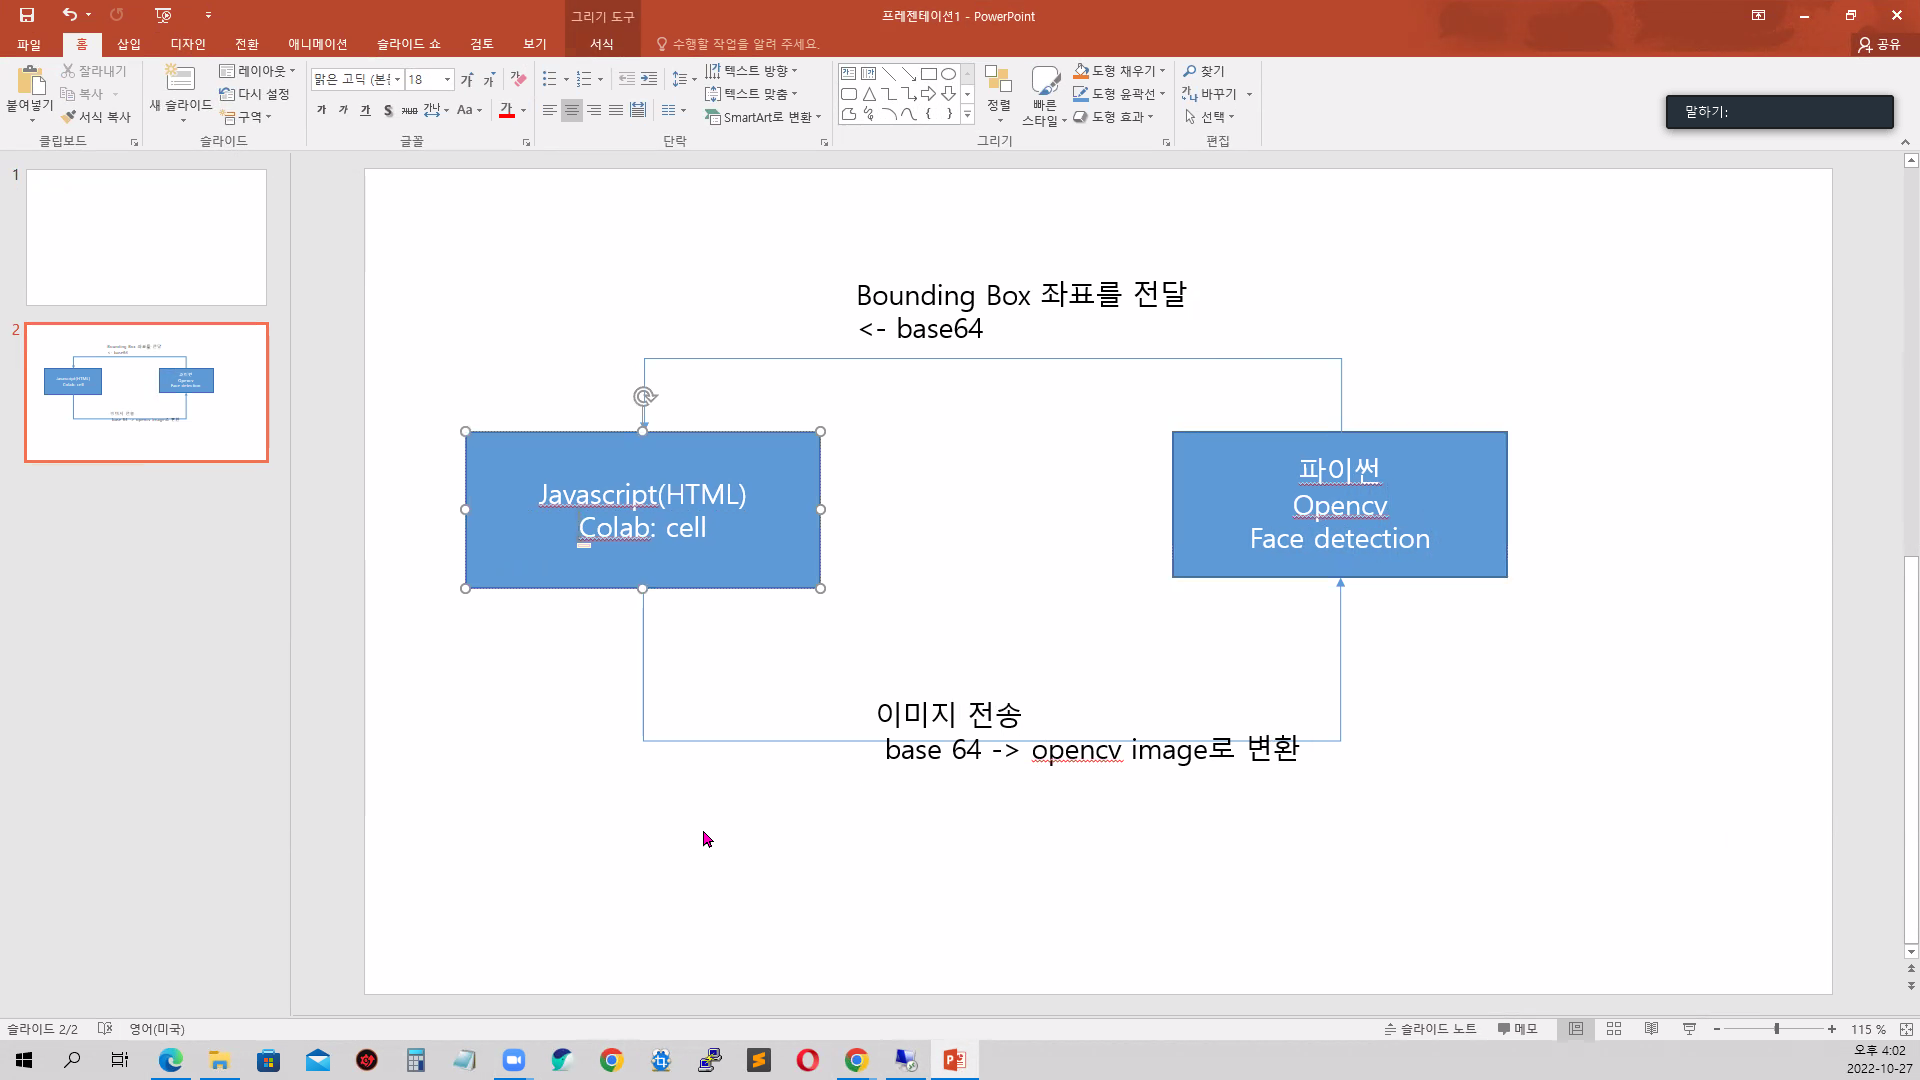

In [80]:
## 17:00
import base64

video_stream() # 화면이 나오지 않는 이유 ( 비동기로 선언되어 있기 때문 - 자동으로 실행되는 것이 아니라 호출해야 실행 됨)
bbox = ''
count = 0
while True: # 파이썬에서 하는 일: 이미지를 전달 받고 (자바스크립트 웹캠에서 만든 ) -> opencv로 바운딩 박스 생성
  js_reply = video_frame("Capturing", bbox) # 눈에 보이는 정도의 차이는 아니지만 시차가 있음
  if not js_reply:
    break
  img = js_to_image(js_reply["img"]) # base64 -> python 이미지로 변환
  bbox_array = np.zeros([480, 640, 4], dtype=np.uint8)
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) # detect하려면 grayscale 이미지가 필요 (RGB)
  faces = face_cascade.detectMultiScle(gray) # 이미지 모델들은 CNN, FFNN 계산이 복잡 * RGB ( 채널까지 더해져 복잡 )
  for (x, y, w, h) in faces:
    bbox_array = cv2.rectangle(bbox_array, (x, y), (x+w,y+h),(255, 0, 0), 2) # 좌표로 변환
  # axis = 0 : 행
  bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0).astype(int) * 255
  bbox_bytes = bbox_to_bytes(bbox_array) # javascript로 전송 ( 웹브라우저 출력은 자바스크립트하고 있기 때문에 변환해서 전송)
  bbox = bbox_bytes

<IPython.core.display.Javascript object>

MessageError: ignored

In [ ]:
# 문제 : 가우시안 블러 처리를 추가해보시오 ## 취소하겠습니다